#  Proyecto Individual Machine Learning 
## Recomendación de juegos para usuarios de la plataforma  Steam
## Henry - Dataft 19 - Rafael Piñera

### Steam requiere un sistema de recomendación de videojuegos para usuarios. Además requiere algunas funciones. Y un video mostrando el funcionamiento.

In [8]:
from fastapi import FastAPI

PRIMERO:    
Comenzaré cargando los datasets correspondientes.
-Los Data Sets originales se encuentran en archivos JSON, que por su peso no van a ser cargados a la web.-  
estos son: a- output_steam_games; b- australian_users; c- australian_items    
Procederé a la limpieza de los datos (borrar duplicados, eliminar los Null correspondientes)        
Generando así un DataFrame y luego un CSV para cada set.      
user_items.csv - user_reviews.csv - output.csv    
A user_reviews.csv, le agregaré también la columna Sentiment Análisis,  
aplicando análisis de sentimiento con NLP con la siguiente escala: debe tomar el valor '0' si es malo, '1' si es neutral y '2' si es positivo.  
  
    
SEGUNDO        
Definiré las funciones  
1 def developer( *`desarrollador` : str* )**:  
    `Cantidad` de items y `porcentaje` de contenido Free por año según empresa desarrolladora.  
2 def userdata( *`User_id` : str* )**:  
    `Cantidad` de dinero gastado por el usuario, el `porcentaje` de recomendación en base a reviews.recommend y `cantidad de items`  
3 def UserForGenre( *`genero` : str* )**:  
    El usuario que acumula más horas jugadas para el género dado y una lista de la acumulación de horas jugadas por año de lanzamiento.  
4 def best_developer_year( *`año` : int* )**:  
   Devuelve el top 3 de desarrolladores con juegos MÁS recomendados por usuarios para el año dado.   
5 def developer_reviews_analysis( *`desarrolladora` : str* )**:  
    Según el desarrollador, se devuelve un diccionario con el nombre del desarrollador como llave y una lista con la cantidad total   
    de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento como valor positivo o negativo.  
  
También investigaré en youtube sobre el algorítmo que podré usar para el modelo de ML.       
    
TERCERO     
Realizaré un EDA (Exploratory data Análisys).  
Que será guardado en un archivo aparte llamado "EDA.ipynb"  


CUARTO    
Para el modelo de Machine Learning,     
Usaré el modelo de user-item, aplicando un *filtro colaborativo*  
Realizaré el preprocesamiento de los datos y definiré algunas métricas.  
Dividiré en Train-y-Test y entrenaré el modelo.  
Una vez entrenado, guardaré las variables del modelo usando una librería llamada pickle  
Esto último para no tener que entrenarlo cada vez y ahorrar memoria para la parte del deploy.  
Además para cuando se ingrese un usuario que no figura en la base de datos... se tomará como si fuese un usuario nuevo  
A estó último se le llama cold-start, y definí para esto que se le recomienden los juegos mas populares.  
  

QUINTO    
Paso las funciones en limpio y las defino junto con la de ML en el archivo "funciones.py"  
Instalo FastAPI  
Creo una cuenta en render  
Creo el archivo main que hace las consultas con Fast Api  
  
  


## PRIMERO

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [10]:
# Reemplaza 'nombre_del_archivo.json' con el nombre real de tu archivo JSON
output = pd.read_json('output_steam_games.json', lines=True)


In [11]:
output

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


In [12]:
output.shape

(120445, 13)

In [13]:
call_id_counts = output['id'].value_counts()
call_id_counts

id
612880.0    2
761140.0    1
530200.0    1
518690.0    1
513460.0    1
           ..
676060.0    1
494160.0    1
215280.0    1
667090.0    1
681550.0    1
Name: count, Length: 32132, dtype: int64

In [14]:
# Obtén las id que aparecen más de una vez
# Obtén las id que aparecen más de una vez
id_mas_de_una_vez = call_id_counts[call_id_counts > 1].index.tolist()

print(id_mas_de_una_vez)


[612880.0]


In [15]:
fila_id_612880 = output.loc[output['id'] == 612880.0]
fila_id_612880

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
102204,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,0.0,612880.0,Machine Games
102883,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/Wolfe...,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,0.0,612880.0,Machine Games


In [16]:
#borramos los valores vacios del principio
#borramos los valores duplicados
output = output.drop(range(0,88384))
output = output.drop(102204)

In [17]:
# Verificar si hay valores no numéricos en alguna columna
columnas_no_numericas = output.apply(pd.to_numeric, errors='coerce').isnull().any()

# Imprimir las columnas que contienen valores no numéricos
print("Columnas con valores no numéricos:")
print(columnas_no_numericas[columnas_no_numericas].index.tolist())

Columnas con valores no numéricos:
['publisher', 'genres', 'app_name', 'title', 'url', 'release_date', 'tags', 'reviews_url', 'specs', 'price', 'id', 'developer']


In [18]:
valores_no_numericos_price = pd.to_numeric(output['price'], errors='coerce').isnull()

# Imprimir los valores no numéricos en la columna 'price'
print("Valores no numéricos en la columna 'price':")
print(output.loc[valores_no_numericos_price, 'price'])

Valores no numéricos en la columna 'price':
88392     None
88412     None
88413     None
88464     None
88501     Free
          ... 
120421    None
120431    Free
120433    None
120435    None
120438    None
Name: price, Length: 3270, dtype: object


In [19]:
fila_indice_88412 = output.loc[88412]

# Imprimir la fila
fila_indice_88412

publisher                                          Rockstar Games
genres                                                   [Action]
app_name                                         Grand Theft Auto
title                                            Grand Theft Auto
url             http://store.steampowered.com/app/12170/Grand_...
release_date                                           1998-06-30
tags            [Action, Classic, Open World, Singleplayer, 2D...
reviews_url     http://steamcommunity.com/app/12170/reviews/?b...
specs                                             [Single-player]
price                                                        None
early_access                                                  0.0
id                                                        12170.0
developer                                          Rockstar North
Name: 88412, dtype: object

In [20]:
# Convertir la columna 'id' a tipo numérico y obtener los valores no numéricos
valores_no_numericos_id = pd.to_numeric(output['id'], errors='coerce').isnull()

# Imprimir los valores no numéricos en la columna 'id'
print("Valores no numéricos en la columna 'id':")
print(output.loc[valores_no_numericos_id, 'id'])

Valores no numéricos en la columna 'id':
88384    NaN
119271   NaN
Name: id, dtype: float64


In [21]:
# Convertir la columna 'price' a tipo numérico y reemplazar NaN con ceros
output['price'] = pd.to_numeric(output['price'], errors='coerce').fillna(0)

# Imprimir los valores no numéricos en la columna 'price' después de la conversión
print("Valores no numéricos en la columna 'price' después de la conversión:")
print(output.loc[output['price'].isnull(), 'price'])

Valores no numéricos en la columna 'price' después de la conversión:
Series([], Name: price, dtype: float64)


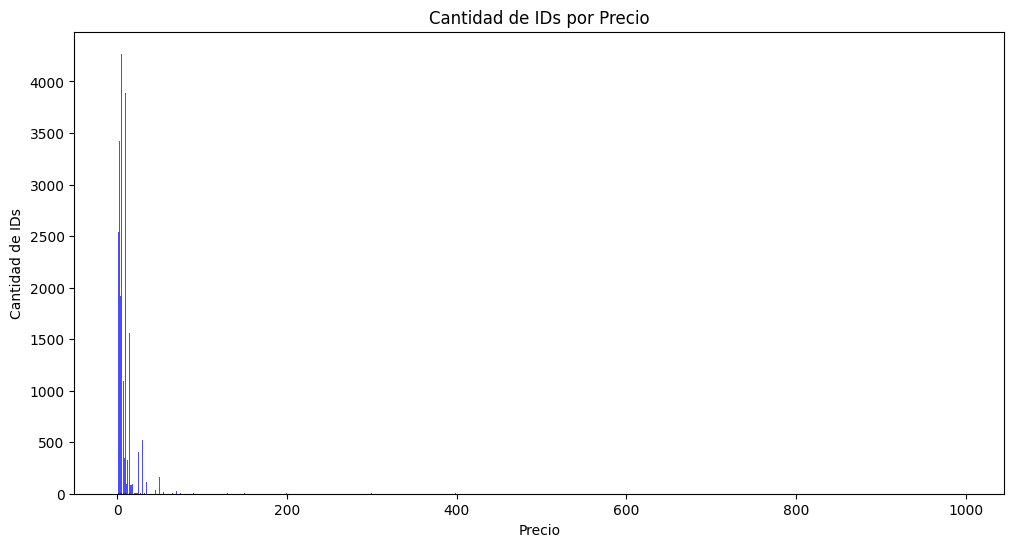

In [22]:
# Convertir la columna 'price' a tipo numérico y reemplazar NaN con ceros
output['price'] = pd.to_numeric(output['price'], errors='coerce').fillna(0)

# Agrupar por precio y contar la cantidad de IDs
agrupado_por_precio = output.groupby('price')['id'].count().reset_index()

# Graficar un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(agrupado_por_precio['price'], agrupado_por_precio['id'], color='blue', alpha=0.7)
plt.title('Cantidad de IDs por Precio')
plt.xlabel('Precio')
plt.ylabel('Cantidad de IDs')
plt.show()

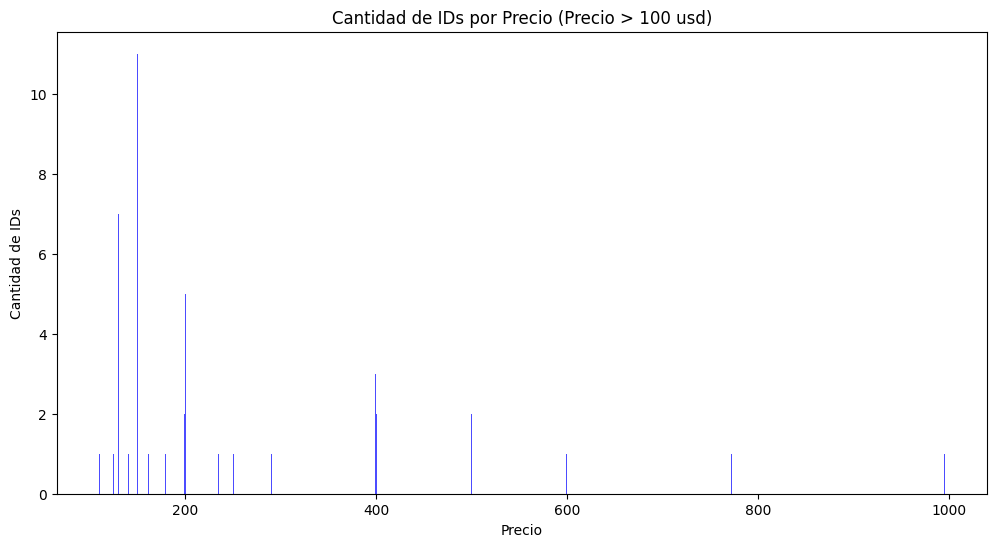

In [23]:
#Grafico que muestra los mayores a 100 dolares
output_filtrado = output[output['price'] > 100]

# Agrupar por precio y contar la cantidad de IDs
agrupado_por_precio = output_filtrado.groupby('price')['id'].count().reset_index()

# Graficar un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(agrupado_por_precio['price'], agrupado_por_precio['id'], color='blue', alpha=0.7)
plt.title('Cantidad de IDs por Precio (Precio > 100 usd)')
plt.xlabel('Precio')
plt.ylabel('Cantidad de IDs')
plt.show()

In [24]:
output.rename(columns={'id': 'item_id'}, inplace=True)
output.to_csv('output.csv', index=False)

-----------

In [25]:
#usamos la librería ast

data_list = []
#Ruta del archivo JSON
file_path = 'australian_users_items.json'

#Abrir el archivo y procesar cada línea
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            # Usar ast.literal_eval para convertir la línea en un diccionario
            json_data = ast.literal_eval(line)
            data_list.append(json_data)
        except ValueError as e:
            print(f"Error en la línea: {line}")
            continue

#Crear un DataFrame a partir de la lista de diccionarios
data_it = pd.DataFrame(data_list)

In [26]:
data_it

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [27]:
# #se desanidan los datos de la columna ['items']
data_it1 = data_it.explode(['items'])
data_it2 = pd.json_normalize(data_it1['items']).set_index(data_it1['items'].index)


In [28]:
data_it3= pd.concat([data_it2, data_it1], axis=1)

# #se eliminan las columnas que no se consideran relevantes para el posterior analisis
data_it3.drop(['items_count','item_name','user_url','steam_id'], axis=1, inplace=True)

# #se eliminan los datos nulos por columnas
data_it3 = data_it3.dropna(subset=['item_id'])
data_it3 = data_it3.dropna(subset=['playtime_forever'])

# #se eliminan 2 columnas adicionales
data_it3.drop(['items','playtime_2weeks'], axis=1, inplace=True)

# #se define el dataframe solo para aquellos juegos donde tuvieron un tiempo jugado (condicion)
data_it3 = data_it3[data_it3['playtime_forever'] != 0]

# #conservar las 3 columnas mas importantes para el analisis
data_it3 = data_it3[['user_id','item_id','playtime_forever']]

# #se eliminan los duplicados y valores nulos en caso de haber
data_it3 = data_it3.drop_duplicates()
data_it3 = data_it3.dropna()

# #se exporta la tabla como archivo separa por comas de nombre 'user_items'
data_it3.to_csv('user_items.csv', index=False)

In [29]:
data_it1

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '10', 'item_name': 'Counter-Strike..."
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '20', 'item_name': 'Team Fortress ..."
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '30', 'item_name': 'Day of Defeat'..."
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '40', 'item_name': 'Deathmatch Cla..."
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '50', 'item_name': 'Half-Life: Opp..."
...,...,...,...,...,...
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '373330', 'item_name': 'All Is Dus..."
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '388490', 'item_name': 'One Way To..."
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '521570', 'item_name': 'You Have 1..."
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '519140', 'item_name': 'Minds Eyes..."


In [30]:
data_it2

,item_id,item_name,playtime_forever,playtime_2weeks
0,10,Counter-Strike,6.0,0.0
0,20,Team Fortress Classic,0.0,0.0
0,30,Day of Defeat,7.0,0.0
0,40,Deathmatch Classic,0.0,0.0
0,50,Half-Life: Opposing Force,0.0,0.0
...,...,...,...,...
88308,373330,All Is Dust,0.0,0.0
88308,388490,One Way To Die: Steam Edition,3.0,3.0
88308,521570,You Have 10 Seconds 2,4.0,4.0
88308,519140,Minds Eyes,3.0,3.0


In [31]:
data_it3

,user_id,item_id,playtime_forever
0,76561197970982479,10,6.0
0,76561197970982479,30,7.0
0,76561197970982479,300,4733.0
0,76561197970982479,240,1853.0
0,76561197970982479,3830,333.0
...,...,...,...
88308,76561198329548331,304930,677.0
88308,76561198329548331,227940,43.0
88308,76561198329548331,388490,3.0
88308,76561198329548331,521570,4.0


In [32]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'user_items.csv'

# Use the pandas read_csv function to load the CSV file into a DataFrame
australian_items = pd.read_csv(csv_file_path)

# Now, 'df' is a DataFrame containing the data from 'user_items.csv'
# You can perform various operations and analysis on this DataFrame

# For example, you can display the first few rows of the DataFrame
australian_items


,user_id,item_id,playtime_forever
0,76561197970982479,10,6.0
1,76561197970982479,30,7.0
2,76561197970982479,300,4733.0
3,76561197970982479,240,1853.0
4,76561197970982479,3830,333.0
...,...,...,...
3246357,76561198329548331,304930,677.0
3246358,76561198329548331,227940,43.0
3246359,76561198329548331,388490,3.0
3246360,76561198329548331,521570,4.0


In [34]:
# Convertir la columna 'item_id' en items y output a enteros
import numpy as np

# Reemplazar valores no finitos con NaN en australian_items
australian_items['item_id'] = australian_items['item_id'].replace([np.inf, -np.inf], np.nan)

# Eliminar filas con NaN en la columna 'item_id' de australian_items
australian_items = australian_items.dropna(subset=['item_id'])

# Convertir la columna 'item_id' en australian_items a enteros
australian_items['item_id'] = australian_items['item_id'].astype(int)

# Reemplazar valores no finitos con NaN en df
output['item_id'] = output['item_id'].replace([np.inf, -np.inf], np.nan)

# Eliminar filas con NaN en la columna 'id' de df
output = output.dropna(subset=['item_id'])

# Convertir la columna 'id' en df a enteros
output['item_id'] = output['item_id'].astype(int)

# Verificar la correspondencia de 'item_id' entre australian_items y df
correspondencia_items = australian_items['item_id'].isin(output['item_id'])

if correspondencia_items.all():
    print("Todos los 'item_id' en items.csv están en output.csv.")
else:
    print("Algunos 'item_id' en items.csv no están en output.csv.")



Algunos 'item_id' en items.csv no están en output.csv.


In [35]:
data_list1 = []
file_path = 'australian_user_reviews.json'

#Abrir el archivo y procesar cada línea
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            # Usar ast.literal_eval para convertir la línea en un diccionario
            json_data = ast.literal_eval(line)
            data_list1.append(json_data)
        except ValueError as e:
            print(f"Error en la línea: {line}")
            continue

#Crear un DataFrame a partir de la lista de diccionarios
data_its = pd.DataFrame(data_list1)

#se desanidan los datos de la columna ['items']
data_it1 = data_its.explode(['reviews'])
data_it2 = pd.json_normalize(data_it1['reviews']).set_index(data_it1['reviews'].index)
reviews= pd.concat([data_it2, data_it1], axis=1)

In [36]:

#se eliminan 2 columnas adicionales
reviews.drop(['reviews'], axis=1, inplace=True)

#se eliminan los duplicados y valores nulos en caso de haber
reviews = reviews.drop_duplicates()
reviews = reviews.dropna()

reviews

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
0,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...
0,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637
1,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637
...,...,...,...,...,...,...,...,...,...
25797,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244,http://steamcommunity.com/profiles/76561198312...
25797,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244,http://steamcommunity.com/profiles/76561198312...
25798,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley,http://steamcommunity.com/id/LydiaMorley
25798,,Posted July 20.,,730,No ratings yet,True,:D,LydiaMorley,http://steamcommunity.com/id/LydiaMorley


-----------
       MODELO DE SENTIMENT ANALISIS:....


Este código crea una nueva columna llamada 'sentiment_analysis' basada en el análisis de sentimiento de las reseñas.  
 Los valores son asignados según la escala especificada (0 para malo, 1 para neutral y 2 para positivo).   
 Además, si una reseña está ausente (valor nulo), se asigna un valor de 1.  

In [37]:
from textblob import TextBlob

def analyze_sentiment(review):
    analysis = TextBlob(str(review))
    # Asigna un valor según el análisis de sentimiento
    if analysis.sentiment.polarity > 0.1: 
        return 2  # Positivo
    elif analysis.sentiment.polarity < -0.1:
        return 0  # Malo
    else:
        return 1  # Neutral

reviews['Sentiment_analysis'] = reviews['review'].apply(analyze_sentiment)
reviews.to_csv('user_reviews.csv', index=False)

In [38]:
reviews.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url,Sentiment_analysis
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2
0,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2
0,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1
1,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637,2
1,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637,1


-----------------

## SEGUNDO

In [40]:
def developer(desarrollador):
    # Suponiendo que 'output.csv' es tu archivo CSV, puedes cargarlo aquí
    dataframe = pd.read_csv('output.csv')
    
    # Filtra el DataFrame para el desarrollador específico
    filtered_df = dataframe[dataframe['publisher'] == desarrollador]
    
    # Convierte la columna 'release_date' a tipo datetime
    filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])
    
    # Crea una nueva columna 'Años' basada en la fecha de lanzamiento
    filtered_df['Años'] = filtered_df['release_date'].dt.year
    
    # Agrupa por año y cuenta la cantidad total de elementos y la cantidad de elementos gratuitos para cada año
    grouped_df = filtered_df.groupby('Años').agg({'item_id': 'count', 'price': lambda x: (x == 0).sum()})
    
    # Renombra las columnas
    grouped_df.rename(columns={'item_id': 'Cantidad de Items', 'price': 'Contenido'}, inplace=True)
    
    # Calcula el porcentaje de contenido gratuito
    grouped_df['Contenido Free'] = (grouped_df['Contenido'] / grouped_df['Cantidad de Items']) * 100
    
    # Elimina la columna 'Contenido Free'
    grouped_df.drop(columns=['Contenido'], inplace=True)
    
    # Restablece el índice para obtener 'Año' como una columna
    grouped_df.reset_index(inplace=True)
    
    return grouped_df

# Llama a la función con el nombre del desarrollador
result_df = developer('Valve')

# Imprime el resultado
print(result_df)




    Años  Cantidad de Items  Contenido Free
0   1999                  2        0.000000
1   2000                  2        0.000000
2   2001                  2        0.000000
3   2003                  1        0.000000
4   2004                  5        0.000000
5   2005                  1      100.000000
6   2006                  2        0.000000
7   2007                  3       33.333333
8   2008                  1        0.000000
9   2009                  1        0.000000
10  2010                  2       50.000000
11  2011                  1        0.000000
12  2012                  2       50.000000
13  2014                  7      100.000000
14  2017                  2        0.000000


/tmp/ipykernel_29451/3790177633.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])
/tmp/ipykernel_29451/3790177633.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Años'] = filtered_df['release_date'].dt.year


In [41]:
#corroboramos que ande bien:
# Cargar el DataFrame output
df_output = pd.read_csv('output.csv')

# Filtrar las filas donde el desarrollador es 'Valve'
valve_rows = df_output[df_output['developer'] == 'Valve']

# Ordenar las filas por año (asumiendo que 'release_date' es una columna de tipo datetime)
valve_rows = valve_rows.sort_values(by='release_date')

# Mostrar las filas resultantes
valve_rows



,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,item_id,developer
32028,Valve,['Action'],Team Fortress Classic,Team Fortress Classic,http://store.steampowered.com/app/20/Team_Fort...,1999-04-01,"['Action', 'FPS', 'Multiplayer', 'Classic', 'S...",http://steamcommunity.com/app/20/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",4.99,0.0,20.0,Valve
32031,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,0.0,10.0,Valve
32030,Valve,['Action'],Ricochet,Ricochet,http://store.steampowered.com/app/60/Ricochet/,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'First-Person...",http://steamcommunity.com/app/60/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",4.99,0.0,60.0,Valve
32033,Valve,['Action'],Deathmatch Classic,Deathmatch Classic,http://store.steampowered.com/app/40/Deathmatc...,2001-06-01,"['Action', 'FPS', 'Multiplayer', 'Classic', 'S...",http://steamcommunity.com/app/40/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",4.99,0.0,40.0,Valve
32039,Valve,['Action'],Day of Defeat,Day of Defeat,http://store.steampowered.com/app/30/Day_of_De...,2003-05-01,"['FPS', 'World War II', 'Multiplayer', 'Action...",http://steamcommunity.com/app/30/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",4.99,0.0,30.0,Valve
32042,Valve,['Action'],Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,http://store.steampowered.com/app/80/CounterSt...,2004-03-01,"['Action', 'FPS', 'Shooter', 'Multiplayer', 'S...",http://steamcommunity.com/app/80/reviews/?brow...,"['Single-player', 'Multi-player', 'Valve Anti-...",9.99,0.0,80.0,Valve
31938,Valve,['Action'],Half-Life: Source,Half-Life: Source,http://store.steampowered.com/app/280/HalfLife...,2004-06-01,"['FPS', 'Action', 'Sci-fi', 'Classic', 'Single...",http://steamcommunity.com/app/280/reviews/?bro...,['Single-player'],9.99,0.0,280.0,Valve
31940,Valve,['Action'],Half-Life 2: Deathmatch,Half-Life 2: Deathmatch,http://store.steampowered.com/app/320/HalfLife...,2004-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'S...",http://steamcommunity.com/app/320/reviews/?bro...,"['Multi-player', 'Valve Anti-Cheat enabled', '...",4.99,0.0,320.0,Valve
31937,Valve,['Action'],Counter-Strike: Source,Counter-Strike: Source,http://store.steampowered.com/app/240/CounterS...,2004-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'T...",http://steamcommunity.com/app/240/reviews/?bro...,"['Multi-player', 'Cross-Platform Multiplayer',...",19.99,0.0,240.0,Valve
31941,Valve,['Action'],Half-Life 2,Half-Life 2,http://store.steampowered.com/app/220/HalfLife_2/,2004-11-16,"['FPS', 'Action', 'Sci-fi', 'Singleplayer', 'C...",http://steamcommunity.com/app/220/reviews/?bro...,"['Single-player', 'Steam Achievements', 'Steam...",9.99,0.0,220.0,Valve


In [42]:
def UserForGenre(genero_especificado):
    # Cargar los Datos
    df_games = pd.read_csv('output.csv')
    df_items = pd.read_csv('user_items.csv')

    # Verificar y eliminar filas con valores NaN en la columna 'genres'
    df_games = df_games.dropna(subset=['genres'])

    # Convertir las listas de texto a listas de Python usando ast.literal_eval
    df_games['genres'] = df_games['genres'].apply(ast.literal_eval)

    # Filtrar por Género
    df_filtered_games = df_games[df_games['genres'].apply(lambda genres: genero_especificado in genres)]

    # Fusión de Datos
    df_merged = pd.merge(df_filtered_games, df_items, on='item_id')

    # Agrupación y Cálculos
    usuario_mas_horas = df_merged.groupby('user_id')['playtime_forever'].sum().idxmax()
    
    # Convertir la columna 'release_date' a objetos de fecha
    df_merged['release_date'] = pd.to_datetime(df_merged['release_date'], errors='coerce', infer_datetime_format=True)
    
    # Filtrar filas con fechas no válidas
    df_merged = df_merged.dropna(subset=['release_date'])

    # Agrupar por año y calcular las horas jugadas
    acumulacion_por_anio = df_merged.groupby(df_merged['release_date'].dt.year)['playtime_forever'].sum().reset_index()

    # Obtener el usuario con más horas jugadas para el género dado
    top_user = df_merged[df_merged['playtime_forever'] == df_merged.groupby('user_id')['playtime_forever'].transform('max')]['user_id'].iloc[0]

    # Construir el Resultado en el Formato Especificado
    resultado = {
        "Usuario con más horas jugadas para el género dado": top_user,
        "Acumulación de horas jugadas por año": [{"Año": int(anio), "Horas": int(horas)} for anio, horas in zip(acumulacion_por_anio['release_date'], acumulacion_por_anio['playtime_forever'])]
    }

    return resultado

# Uso de la función
genero_especificado = 'Strategy'  # Reemplaza con el género que estás buscando
resultado_funcion = UserForGenre(genero_especificado)

resultado_funcion



/tmp/ipykernel_29451/534021189.py:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_merged['release_date'] = pd.to_datetime(df_merged['release_date'], errors='coerce', infer_datetime_format=True)


{'Usuario con más horas jugadas para el género dado': 'bermo',
 'Acumulación de horas jugadas por año': [{'Año': 1988, 'Horas': 13962},
  {'Año': 1990, 'Horas': 60},
  {'Año': 1993, 'Horas': 182863},
  {'Año': 1994, 'Horas': 1169},
  {'Año': 1995, 'Horas': 55227},
  {'Año': 1996, 'Horas': 8468},
  {'Año': 1997, 'Horas': 133571},
  {'Año': 1998, 'Horas': 26109},
  {'Año': 1999, 'Horas': 574941},
  {'Año': 2000, 'Horas': 31052},
  {'Año': 2001, 'Horas': 941295},
  {'Año': 2002, 'Horas': 485452},
  {'Año': 2003, 'Horas': 7274678},
  {'Año': 2004, 'Horas': 3686382},
  {'Año': 2005, 'Horas': 1011928},
  {'Año': 2006, 'Horas': 16585985},
  {'Año': 2007, 'Horas': 3157655},
  {'Año': 2008, 'Horas': 8111475},
  {'Año': 2009, 'Horas': 31776974},
  {'Año': 2010, 'Horas': 140842383},
  {'Año': 2011, 'Horas': 34513058},
  {'Año': 2012, 'Horas': 85583781},
  {'Año': 2013, 'Horas': 145266750},
  {'Año': 2014, 'Horas': 50326482},
  {'Año': 2015, 'Horas': 82202224},
  {'Año': 2016, 'Horas': 31317213},


In [61]:
def userdata(User_id):
    # Cargar los Datos
    df_output = pd.read_csv('output.csv')
    df_items = pd.read_csv('user_items.csv')
    df_reviews = pd.read_csv('user_reviews.csv')

    # Eliminar duplicados en df_reviews
    df_reviews = df_reviews.drop_duplicates()

    # Eliminar duplicados en df_items basados en item_id
    df_items = df_items.drop_duplicates(subset='item_id')

    # Fusión de Datos
    df_merged = pd.merge(df_output, df_items, on='item_id')

    # Filtrar datos por el User_id proporcionado
    user_data = df_merged[df_merged['user_id'] == User_id]

    # Calcular la cantidad de dinero gastado por el usuario
    total_spent = (user_data['playtime_forever'] * user_data['price']).sum()

    # Calcular el porcentaje de recomendación en base a reviews.recommend
    recommend_percentage = df_reviews[df_reviews['user_id'] == User_id]['recommend'].mean() * 100

    # Calcular la cantidad de items
    num_items = len(user_data)

    # Construir el Resultado en el Formato Especificado
    resultado = {
        "Usuario": User_id,
        "Dinero gastado": f"{total_spent:.2f} USD",
        "porcentaje de recomendación": f"{recommend_percentage:.2f}%",
        "Cantidad de items": num_items
    }

    return resultado

# Uso de la función
User_id = 'us213ndjss09sdf'  # Reemplaza con el User_id que estás buscando
resultado_funcion = userdata(User_id)

print(resultado_funcion)

/tmp/ipykernel_29451/186067163.py:5: DtypeWarning: Columns (1,2,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('user_reviews.csv')


{'Usuario': 'us213ndjss09sdf', 'Dinero gastado': '0.00 USD', 'porcentaje de recomendación': 'nan%', 'Cantidad de items': 0}


In [ ]:
import pandas as pd
def UserData(User_id):
    # Asegúrate de cargar tus datos antes de llamar a esta función
    df_games = pd.read_csv('output.csv')
    df_reviews = pd.read_csv('user_reviews.csv')
    # Filtrar las reviews del usuario específico
    user_reviews = df_reviews[df_reviews['user_id'] == User_id]

    # Calcular el porcentaje de recomendación
    total_items = user_reviews['user_id'].nunique()
    percentage_recommendation = (user_reviews['recommend'].mean() / total_items) * 100 if not user_reviews.empty else 0

    # Filtrar los items comprados por el usuario
    user_items = df_games[df_games['user_id'] == User_id]
    user_items['price'] = pd.to_numeric(user_items['price'], errors='coerce')

    # Calcular la cantidad de dinero gastado por el usuario
    total_money_spent = user_items['price'].sum()

    # Obtener la cantidad de items comprados por el usuario
    num_items_purchased = len(user_items)

    # Crear el diccionario de resultados
    result = {
        "Usuario": User_id,
        "Dinero gastado": f"${total_money_spent:.2f} USD",
        "% de recomendación": f"{percentage_recommendation:.2f}%",
        "Cantidad de items": num_items_purchased
    }

    return result


# Uso de la función
User_id = 'us213ndjss09sdf'  # Reemplaza con el User_id que estás buscando
resultado_funcion = UserData(User_id)

print(resultado_funcion)

/tmp/ipykernel_29451/3926878025.py:5: DtypeWarning: Columns (1,2,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('user_reviews.csv')


KeyError: 'user_id'

In [ ]:
def best_developer_year(año):
    # Cargar los DataFrames
    df_reviews = pd.read_csv('user_reviews.csv', dtype={'Sentiment_analysis': str})
    df_output = pd.read_csv('output.csv')

    # Convertir 'recommend' y 'Sentiment_analysis' a tipo booleano después de la lectura
    df_reviews['recommend'] = df_reviews['recommend'].astype(bool)
    
    # Fusionar DataFrames usando 'item_id'
    df_merged = pd.merge(df_reviews, df_output[['item_id', 'publisher', 'release_date']], on='item_id')

    # Convertir 'release_date' a datetime
    df_merged['release_date'] = pd.to_datetime(df_merged['release_date'], errors='coerce')

    # Filtrar por el año dado
    df_filtered = df_merged[df_merged['release_date'].dt.year == año]

    # Filtrar por reviews positivas y recomendadas
    df_filtered = df_filtered[(df_filtered['recommend'] == True) & (df_filtered['Sentiment_analysis'] == '2')]

    # Contar el número de juegos recomendados por cada desarrollador
    developer_counts = df_filtered.groupby('publisher')['item_id'].nunique()

    # Obtener el top 3 de desarrolladores
    top_developers = developer_counts.nlargest(3)

    # Construir el resultado en el formato especificado
    resultado = [{"Puesto {}".format(i+1): developer} for i, developer in enumerate(top_developers.index)]

    return resultado

# Uso de la función
año_dado = 2008  # Reemplaza con el año que estás buscando
resultado_funcion = best_developer_year(año_dado)

print(resultado_funcion)


/tmp/ipykernel_17963/3226873120.py:3: DtypeWarning: Columns (1,2,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('user_reviews.csv', dtype={'Sentiment_analysis': str})


[{'Puesto 1': 'Electronic Arts'}, {'Puesto 2': 'Ubisoft'}, {'Puesto 3': 'Meridian4'}]


In [62]:
def developer_reviews_analysis(desarrolladora):
    # Cargar los DataFrames
    df_reviews = pd.read_csv('user_reviews.csv', dtype={'Sentiment_analysis': str})
    df_output = pd.read_csv('output.csv')

    # Fusionar DataFrames usando 'item_id'
    df_merged = pd.merge(df_reviews, df_output[['item_id', 'developer']], on='item_id')

    # Filtrar por el desarrollador dado
    df_filtered = df_merged[df_merged['developer'] == desarrolladora]

    # Contar la cantidad de registros con análisis de sentimiento positivo y negativo
    sentiment_counts = df_filtered['Sentiment_analysis'].value_counts()

    # Construir el resultado en el formato especificado
    resultado = {desarrolladora: {'Negative': sentiment_counts.get('0', 0), 'Positive': sentiment_counts.get('2', 0)}}

    return resultado

# Uso de la función
desarrolladora_dada = 'Valve'  # Reemplaza con el desarrollador que estás buscando
resultado_funcion = developer_reviews_analysis(desarrolladora_dada)

print(resultado_funcion)


/tmp/ipykernel_29451/1392415247.py:3: DtypeWarning: Columns (1,2,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('user_reviews.csv', dtype={'Sentiment_analysis': str})


{'Valve': {'Negative': 1044, 'Positive': 4527}}


------------------

## TERCERA PARTE
(EDA)

---------------

## CUARTA PARTE (modelo de ML -user item)

El filtrado Colaborativo hace símiles:   

+ITEM BASED
--¿que productos fueron consumidos por los mismos usuarios?, y en función de la similitud entre los productos se hace la recomendación. 

+USER BASED  
--¿que usuarios consumen los mismos productos? y en función de si los productos se parecen, intento recomendar.  

ARRANQUE EN FRIO.  
El filtrado colaborativo necesita de acciones para funcionar.  
Entonces a los usuarios que no han tenido interacciones (como no tengo información), se les va a recomendar el top trending.  


En cuanto a como funciona el algorítmo. Busca las similitudes por cercanía.  
-----DISTANCIA EUCLIDIANA  
-----SIMILITUD DEL COSENO  

..Para aplicar el Algorítmo de recomendación basado en el filtrado colaborativo vamos a modelar un DATASET en el que    
se tenga una fila por usuario y una columna por juego.  
..Además le vamos a asignar un valor de "preferencia" float, a cada usuario respecto de cada juego que tengan o hayan jugado.  
  
..A los usuarios que tengan 0 en todos los juegos, no vamos a recomendarles según esta técnica sino que les vamos a recomendar   
los juegos mas populares  

Para crear un valor de cuanto le gustó a cada uno vamos a tomar en cuenta el Sentiment análisis
y además vamos a tener en cuenta las horas de juego.
  
  
de playtime_forever vamos a sacar el promedio de todos los datos y vamos a dividir  
ese valor en 3 distancias iguales.  
  
en el valor mas chico vamos a ponerle valor 0
en el valor medio +1
en el valor alto +2  
  

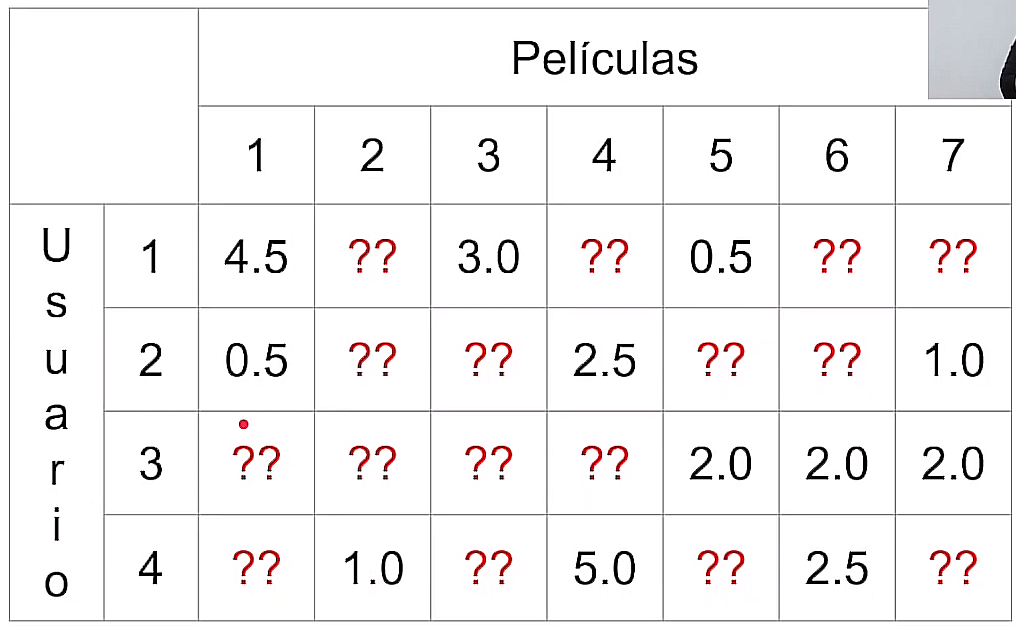

In [ ]:
#voy a buscar generar un cuadro como el siguiente: 
from IPython.display import display, Image

# Especifica la ruta de tu archivo PNG
ruta_imagen = 'cuadro.png'

# Muestra la imagen en el notebook
display(Image(filename=ruta_imagen))


In [ ]:
import pandas as pd

# Cargar los datos desde los CSVs
user_items = pd.read_csv('user_items.csv')
user_reviews = pd.read_csv('user_reviews.csv')

# Unir las tablas user_items y user_reviews basadas en la columna 'user_id'
merged_data = pd.merge(user_items,user_reviews, how="inner")

# Visualizar el conjunto de datos combinado

merged_data



/tmp/ipykernel_19615/2811246393.py:5: DtypeWarning: Columns (1,2,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  user_reviews = pd.read_csv('user_reviews.csv')


,user_id,item_id,playtime_forever,funny,posted,last_edited,helpful,recommend,review,user_url,Sentiment_analysis
0,76561197970982479,22200,271.0,NaN,"Posted July 15, 2011.",NaN,No ratings yet,True,It's unique and worth a playthrough.,http://steamcommunity.com/profiles/76561197970...,2.0
1,76561197970982479,1250,10006.0,NaN,"Posted November 5, 2011.",NaN,No ratings yet,True,Simple yet with great replayability. In my opi...,http://steamcommunity.com/profiles/76561197970...,2.0
2,76561197970982479,43110,834.0,NaN,"Posted April 21, 2011.",NaN,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,http://steamcommunity.com/profiles/76561197970...,1.0
3,js41637,227300,551.0,NaN,"Posted September 8, 2013.",NaN,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,http://steamcommunity.com/id/js41637,1.0
4,js41637,239030,349.0,NaN,"Posted November 29, 2013.",NaN,1 of 4 people (25%) found this review helpful,True,Very fun little game to play when your bored o...,http://steamcommunity.com/id/js41637,1.0
...,...,...,...,...,...,...,...,...,...,...,...
44092,Ghoustik,730,3969.0,NaN,Posted June 17.,NaN,0 of 1 people (0%) found this review helpful,True,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...,http://steamcommunity.com/id/Ghoustik,1.0
44093,76561198312638244,70,1010.0,NaN,Posted July 10.,NaN,No ratings yet,True,a must have classic from steam definitely wort...,http://steamcommunity.com/profiles/76561198312...,2.0
44094,76561198312638244,130,221.0,NaN,Posted July 10.,NaN,No ratings yet,True,if you liked Half life i would really recommen...,http://steamcommunity.com/profiles/76561198312...,2.0
44095,76561198312638244,233270,533.0,NaN,Posted July 21.,NaN,No ratings yet,True,this is a very fun and nice 80s themed shooter...,http://steamcommunity.com/profiles/76561198312...,2.0


In [ ]:
columnas_a_eliminar = ['funny', 'posted', 'last_edited', 'helpful', 'recommend', 'review', 'user_url']

merged_data = merged_data.drop(columnas_a_eliminar, axis=1)

In [ ]:
df = merged_data
df

,user_id,item_id,playtime_forever,Sentiment_analysis
0,76561197970982479,22200,271.0,2.0
1,76561197970982479,1250,10006.0,2.0
2,76561197970982479,43110,834.0,1.0
3,js41637,227300,551.0,1.0
4,js41637,239030,349.0,1.0
...,...,...,...,...
44092,Ghoustik,730,3969.0,1.0
44093,76561198312638244,70,1010.0,2.0
44094,76561198312638244,130,221.0,2.0
44095,76561198312638244,233270,533.0,2.0


In [ ]:
promedio_playtime = df['playtime_forever'].mean()
promedio_playtime

9050.832845771822

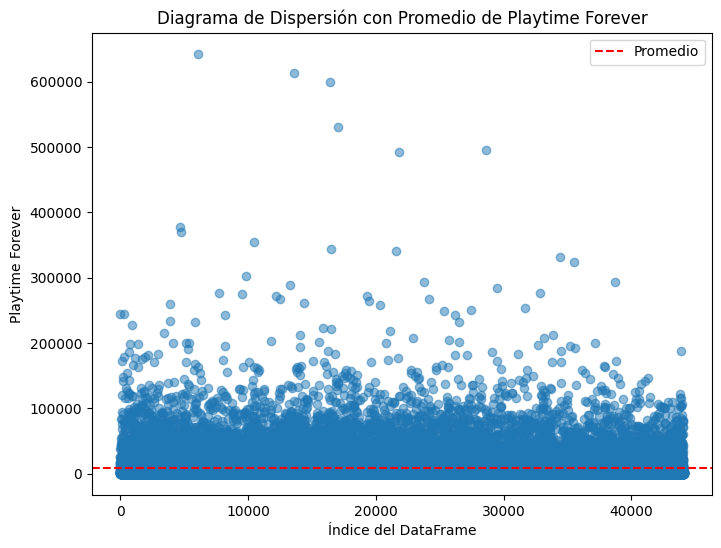

In [ ]:
import matplotlib.pyplot as plt

# Asumiendo que df es tu DataFrame y 'playtime_forever' es tu columna de interés

# Calcular el promedio de playtime_forever
promedio_playtime = df['playtime_forever'].mean()

# Crear un diagrama de dispersión con la línea del promedio
plt.figure(figsize=(8, 6))
plt.scatter(x=df.index, y=df['playtime_forever'], alpha=0.5)  # alpha controla la transparencia de los puntos
plt.axhline(y=promedio_playtime, color='r', linestyle='--', label='Promedio')  # Línea horizontal para el promedio
plt.title('Diagrama de Dispersión con Promedio de Playtime Forever')
plt.xlabel('Índice del DataFrame')
plt.ylabel('Playtime Forever')
plt.legend()
plt.show()


In [ ]:
# Calcula las distancias igualmente divididas
distancia_chica = promedio_playtime / 3
distancia_media = promedio_playtime - (distancia_chica*2) # La distancia media es simplemente el promedio
distancia_grande = promedio_playtime - distancia_chica  # Suma la distancia chica al promedio para obtener la distancia grande

print(f'Promedio de playtime_forever: {promedio_playtime}')
print(f'Distancia chica: {distancia_chica}')
print(f'Distancia media: {distancia_media}')
print(f'Distancia grande: {distancia_grande}')


#Horas en un año = 365 dias ×24 = 8,760 hours


# Función para asignar el valor según las distancias
def asignar_valor(playtime):
    if playtime <= distancia_chica:
        return 0
    elif distancia_chica < playtime <= distancia_media:  # Corregir la línea con paréntesis
        return 1
    else:
        return 2


# Aplica la función a la columna 'playtime forever' para crear la nueva columna 'nueva_columna'
df['playtime'] = df['playtime_forever'].apply(asignar_valor)

# Mapear user_id a identificadores numéricos únicos
user_id_mapping = {user_id: i for i, user_id in enumerate(df['user_id'].unique())}
df['user_id_numeric'] = df['user_id'].map(user_id_mapping)

# Mapear item_id a identificadores numéricos únicos
item_id_mapping = {item_id: i for i, item_id in enumerate(df['item_id'].unique())}
df['item_id_numeric'] = df['item_id'].map(item_id_mapping)

# Mostrar el DataFrame resultante
df



Promedio de playtime_forever: 9050.832845771822
Distancia chica: 3016.9442819239407
Distancia media: 3016.9442819239403
Distancia grande: 6033.8885638478805


,user_id,item_id,playtime_forever,Sentiment_analysis,playtime,user_id_numeric,item_id_numeric
0,76561197970982479,22200,271.0,2.0,0,0,0
1,76561197970982479,1250,10006.0,2.0,2,0,1
2,76561197970982479,43110,834.0,1.0,0,0,2
3,js41637,227300,551.0,1.0,0,1,3
4,js41637,239030,349.0,1.0,0,1,4
...,...,...,...,...,...,...,...
44092,Ghoustik,730,3969.0,1.0,2,19902,19
44093,76561198312638244,70,1010.0,2.0,0,19903,164
44094,76561198312638244,130,221.0,2.0,0,19903,693
44095,76561198312638244,233270,533.0,2.0,0,19903,382


In [ ]:
# Suma la columna 'playtime_forever' al 'Sentiment_analysis'
df['combined_rating'] = df['Sentiment_analysis'] + df['playtime']
df

,user_id,item_id,playtime_forever,Sentiment_analysis,playtime,user_id_numeric,item_id_numeric,combined_rating
0,76561197970982479,22200,271.0,2.0,0,0,0,2.0
1,76561197970982479,1250,10006.0,2.0,2,0,1,4.0
2,76561197970982479,43110,834.0,1.0,0,0,2,1.0
3,js41637,227300,551.0,1.0,0,1,3,1.0
4,js41637,239030,349.0,1.0,0,1,4,1.0
...,...,...,...,...,...,...,...,...
44092,Ghoustik,730,3969.0,1.0,2,19902,19,3.0
44093,76561198312638244,70,1010.0,2.0,0,19903,164,2.0
44094,76561198312638244,130,221.0,2.0,0,19903,693,2.0
44095,76561198312638244,233270,533.0,2.0,0,19903,382,2.0


In [ ]:
# Utiliza pivot para crear una matriz de recomendación
matriz_recomendacion = df.pivot(index='user_id_numeric', columns='item_id_numeric', values='combined_rating')

# Llenar los valores NaN con 0
matriz_recomendacion = matriz_recomendacion.fillna(0)

# Ahora, matriz_recomendacion es una matriz de recomendación con la suma de 'Sentiment_analysis' y 'playtime_forever'
matriz_recomendacion


item_id_numeric,0,1,2,3,4,5,6,7,8,9,...,3072,3073,3074,3075,3076,3077,3078,3079,3080,3081
user_id_numeric,,,,,,,,,,,,,,,,,,,,,
0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Se obtienen los valores de la matriz como un array
ratings = matriz_recomendacion.values

# Se calcula la cantidad de elementos no cero en la matriz
sparsity = float(len(ratings.nonzero()[0]))

# Se calcula la sparsity dividiendo la cantidad de elementos no cero entre el total de elementos en la matriz
sparsity /= (ratings.shape[0] * ratings.shape[1])

# Se convierte el resultado a porcentaje multiplicando por 100
sparsity *= 100

# Se imprime el resultado formateado
print('Sparsity: {:4.2f}%'.format(sparsity))


Sparsity: 0.07%


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.metrics.pairwise
import matplotlib.pyplot as plt

# Supongamos que 'matriz_recomendacion' es tu DataFrame con los datos

# Obtén los valores de la matriz
ratings = matriz_recomendacion.values

# División en conjuntos de entrenamiento y prueba
ratings_train, ratings_test = train_test_split(ratings, test_size=0.2, random_state=42)

# Imprime las formas de los conjuntos resultantes
print('Shape of ratings_train:', ratings_train.shape)
print('Shape of ratings_test:', ratings_test.shape)



Shape of ratings_train: (15923, 3082)
Shape of ratings_test: (3981, 3082)


Shape of sim_matrix: (19904, 19904)


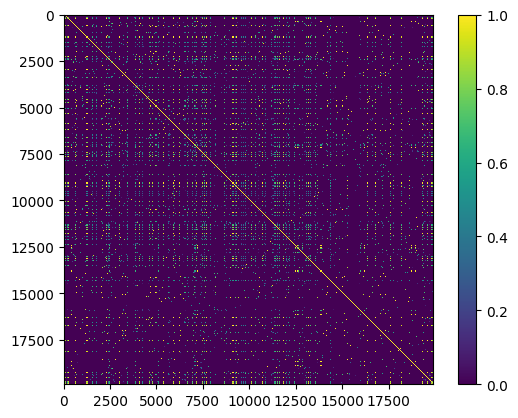

In [ ]:
# Ahora calculamos en una nueva matriz la similitud entre usuarios.
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings)
print('Shape of sim_matrix:', sim_matrix.shape)

plt.imshow(sim_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()


In [ ]:
import numpy as np

# Supongamos que 'ratings_train' y 'sim_matrix' están definidos previamente

# Número de usuarios y elementos
num_users, num_items = ratings_train.shape

# Número de usuarios en el conjunto de prueba
num_test_users = ratings_test.shape[0]

# Selecciona una parte de la matriz de similitud para el conjunto de entrenamiento
sim_matrix_train = sim_matrix[:num_users, :num_users]

# Selecciona una parte de la matriz de similitud para el conjunto de prueba
sim_matrix_test = sim_matrix[num_users:num_users+num_test_users, :num_users]

# Realiza las predicciones para el conjunto de entrenamiento
users_predictions_train = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T

# Realiza las predicciones para el conjunto de prueba
users_predictions_test = sim_matrix_test.dot(ratings_train) / np.array([np.abs(sim_matrix_test).sum(axis=1)]).T

# Imprime las formas de los conjuntos resultantes
print('Shape of users_predictions_train:', users_predictions_train.shape)
print('Shape of users_predictions_test:', users_predictions_test.shape)


Shape of users_predictions_train: (15923, 3082)
Shape of users_predictions_test: (3981, 3082)


/tmp/ipykernel_98779/3263818506.py:21: RuntimeWarning: invalid value encountered in divide
  users_predictions_test = sim_matrix_test.dot(ratings_train) / np.array([np.abs(sim_matrix_test).sum(axis=1)]).T


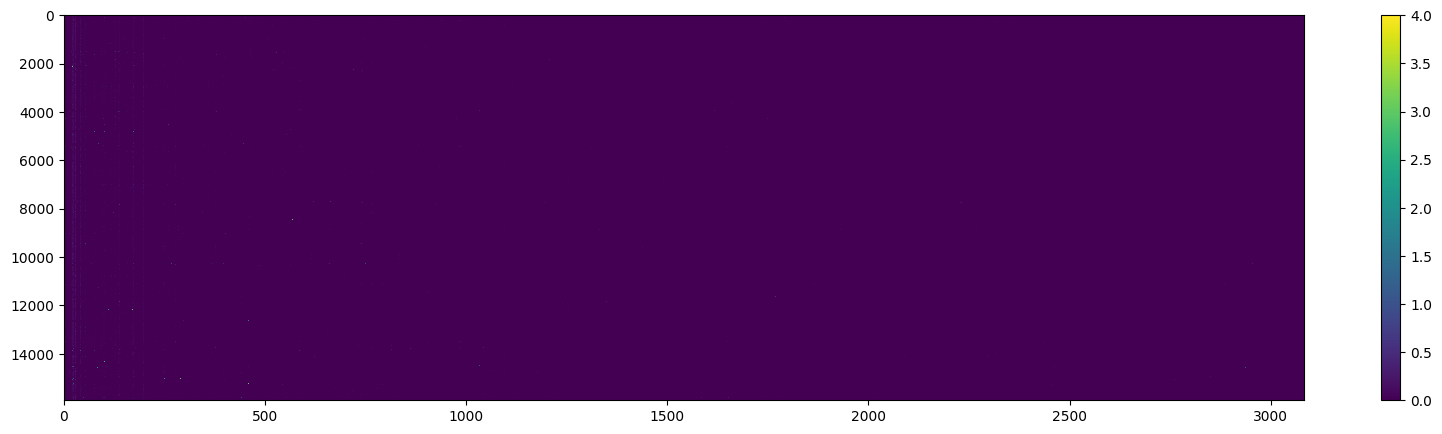

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que 'users_predictions_train' está definido previamente

# Configura el tamaño de la figura
plt.rcParams['figure.figsize'] = (20.0, 5.0)

# Muestra la imagen de las predicciones del conjunto de entrenamiento
plt.imshow(users_predictions_train, aspect='auto', cmap='viridis', interpolation='none')

# Añade una barra de color
plt.colorbar()

# Muestra la figura
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

def get_mse(preds, actuals):
    if preds.shape[1] != actuals.shape[1]:
        actuals = actuals.T
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)

# Calcula el MSE en el conjunto de entrenamiento
mse_train = get_mse(users_predictions_train, ratings_train)
print('MSE on training set:', mse_train)

# Calcula las predicciones para el conjunto de prueba
users_predictions_test = sim_matrix_test.dot(ratings_train) / np.array([np.abs(sim_matrix_test).sum(axis=1)]).T

# Calcula el MSE en el conjunto de prueba
mse_test = get_mse(users_predictions_test, ratings_test)
print('MSE on test set:', mse_test)


MSE on training set: 5.176540662217871


/tmp/ipykernel_98779/120244654.py:15: RuntimeWarning: invalid value encountered in divide
  users_predictions_test = sim_matrix_test.dot(ratings_train) / np.array([np.abs(sim_matrix_test).sum(axis=1)]).T


ValueError: Input contains NaN.

In [ ]:
print("NaN in users_predictions_test:", np.isnan(users_predictions_test).any())
print("NaN in ratings_test:", np.isnan(ratings_test).any())


NaN in users_predictions_test: True
NaN in ratings_test: False


In [ ]:
# Elimina las filas que contienen NaN en users_predictions_test y ratings_test
nan_rows = np.isnan(users_predictions_test).any(axis=1) | np.isnan(ratings_test).any(axis=1)
users_predictions_test = users_predictions_test[~nan_rows, :]
ratings_test = ratings_test[~nan_rows, :]


In [ ]:
mse_test = get_mse(users_predictions_test, ratings_test)
print('MSE on test set:', mse_test)


MSE on test set: 5.903056978379874


In [ ]:
import numpy as np

def recommendation_for_user(user_id, n=5):
    # Obtén la fila correspondiente al usuario en la matriz de similitud
    user_similarities = sim_matrix[user_id]

    # Encuentra los índices de los usuarios más similares (excluyendo al propio usuario)
    similar_users = np.argsort(user_similarities)[::-1][1:]

    # Suma ponderada de las calificaciones de juegos de usuarios similares
    weighted_sum = np.zeros(ratings.shape[1])
    total_similarity = 0

    for similar_user in similar_users:
        if not np.isnan(sim_matrix[user_id, similar_user]):
            weighted_sum += sim_matrix[user_id, similar_user] * ratings[similar_user]
            total_similarity += np.abs(sim_matrix[user_id, similar_user])

    # Calcula las predicciones dividiendo por la suma total de similitudes
    user_predictions = weighted_sum / total_similarity

    # Encuentra los índices de los juegos no jugados por el usuario
    games_played = np.where(ratings[user_id] > 0)[0]
    games_not_played = np.where(ratings[user_id] == 0)[0]

    # Filtra los juegos ya jugados
    user_predictions = np.delete(user_predictions, games_played)

    # Obtén los índices de los juegos recomendados (los de mayor predicción)
    recommended_indices = np.argsort(user_predictions)[::-1][:n]

    # Obtén los identificadores reales de los juegos recomendados
    recommended_games = games_not_played[recommended_indices]

    return recommended_games


Juegos recomendados para el usuario 0: [ 24  28  19  52 174]


In [ ]:
user_id_example = 900  # Cambia esto por el ID real de un usuario
recommended_games = recommendation_for_user(user_id_example)

print(f"Juegos recomendados para el usuario {user_id_example}: {recommended_games}")

Juegos recomendados para el usuario 900: [24 28 76 23 41]


In [ ]:
# lista_de_numeros es la lista de valores de item_id_numeric que estás buscando
lista_de_numeros = recommended_games
# Filtrar el DataFrame para obtener las filas donde item_id_numeric está en la lista
resultados = df[df['item_id_numeric'].isin(lista_de_numeros)]

# Mostrar solo las columnas 'item_id_numeric' y 'user_id'
valores_correspondientes = resultados[['item_id_numeric', 'item_id']]

# Eliminar duplicados basados en 'item_id_numeric'
valores_correspondientes = valores_correspondientes.drop_duplicates(subset='item_id_numeric')

# Imprimir o trabajar con los resultados
valores_correspondientes


,item_id_numeric,item_id
24,23,304930
25,24,4000
31,28,218620
50,41,221100
94,76,252490


In [ ]:
merged_df = pd.merge(valores_correspondientes, output[['item_id', 'app_name', 'genres']], on='item_id', how='inner')

# Muestra los resultados
merged_df[['item_id', 'app_name', 'genres']]

NameError: name 'pd' is not defined

In [ ]:
resultado = df[df['user_id_numeric'] == 600]['user_id']
# Muestra los resultados
print(resultado)

1396    76561198068479124
1397    76561198068479124
Name: user_id, dtype: object


In [ ]:
"""Transformo todo el código anterior en una sola función"""
#ADEMAS LE AGREGO EL COLD START PARA LOS USUARIOS QUE NO SEAN ENCONTRADOS EN LA LISTA DE USER ITEMS.
#ADEMÁS COMPLEMENTO EL SISTEMA DE RECOMENDACIÓN USR - ITEM, mostrando los juegos mas comprados a quienes no llegan a tener suficientes 
#recomendaciones.

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.metrics.pairwise
import pandas as pd
import numpy as np
import ast

"""PARTE_A Creando y entrenando el modelo"""

def recomendacion_usuario(id_de_usuario):
    # Cargar los datos desde los CSVs
    user_items = pd.read_csv('user_items.csv')
    user_reviews = pd.read_csv('user_reviews.csv')
    output = pd.read_csv('output.csv')

    # Unir las tablas user_items y user_reviews basadas en la columna 'user_id'
    merged_data = pd.merge(user_items, user_reviews, how="inner")

    columnas_a_eliminar = ['funny', 'posted', 'last_edited', 'helpful', 'recommend', 'review', 'user_url']

    df = merged_data.drop(columnas_a_eliminar, axis=1)
    promedio_playtime = df['playtime_forever'].mean()


    if id_de_usuario not in user_items['user_id'].values:
        popular_items = user_items['item_id'].value_counts().index[:6]
        popular_items_details = pd.merge(pd.DataFrame({'item_id': popular_items}),
                                             output[['item_id', 'app_name']],
                                             on='item_id', how='inner')
        return popular_items_details

    else:
        distancia_chica = promedio_playtime / 3
        distancia_media = promedio_playtime - (distancia_chica * 2)

        def asignar_valor(playtime):
            if playtime <= distancia_chica:
                return 0
            elif distancia_chica < playtime <= distancia_media:
                return 1
            else:
                return 2

        # Aplica la función a la columna 'playtime forever' para crear la nueva columna 'nueva_columna'
        df['playtime'] = df['playtime_forever'].apply(asignar_valor)


        user_id_mapping = {user_id: i for i, user_id in enumerate(df['user_id'].unique())}
        df['user_id_numeric'] = df['user_id'].map(user_id_mapping)

        # Mapear item_id a identificadores numéricos únicos
        item_id_mapping = {item_id: i for i, item_id in enumerate(df['item_id'].unique())}
        df['item_id_numeric'] = df['item_id'].map(item_id_mapping)

        # Find the corresponding user_id_numeric using the mapping
        user_id_num = user_id_mapping.get(id_de_usuario, None)

        

        # Suma la columna 'playtime_forever' al 'Sentiment_analysis'
        df['combined_rating'] = df['Sentiment_analysis'] + df['playtime']
        
        # Utiliza pivot para crear una matriz de recomendación
        matriz_recomendacion = df.pivot(index='user_id_numeric', columns='item_id_numeric', values='combined_rating')

        # Llenar los valores NaN con 0
        matriz_recomendacion = matriz_recomendacion.fillna(0)

        # Se obtienen los valores de la matriz como un array
        ratings = matriz_recomendacion.values

        # Se calcula la cantidad de elementos no cero en la matriz
        sparsity = float(len(ratings.nonzero()[0]))

        # Se calcula la sparsity dividiendo la cantidad de elementos no cero entre el total de elementos en la matriz
        sparsity /= (ratings.shape[0] * ratings.shape[1])

        # Se convierte el resultado a porcentaje multiplicando por 100
        sparsity *= 100

        # División en conjuntos de entrenamiento y prueba
        ratings_train, ratings_test = train_test_split(ratings, test_size=0.2, random_state=42)

        sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings)

        # Número de usuarios y elementos
        num_users, num_items = ratings_train.shape

        # Número de usuarios en el conjunto de prueba
        num_test_users = ratings_test.shape[0]

        # Selecciona una parte de la matriz de similitud para el conjunto de entrenamiento
        sim_matrix_train = sim_matrix[:num_users, :num_users]

        # Selecciona una parte de la matriz de similitud para el conjunto de prueba
        sim_matrix_test = sim_matrix[num_users:num_users+num_test_users, :num_users]

        # Realiza las predicciones para el conjunto de entrenamiento
        users_predictions_train = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T

        # Realiza las predicciones para el conjunto de prueba
        users_predictions_test = sim_matrix_test.dot(ratings_train) / np.array([np.abs(sim_matrix_test).sum(axis=1)]).T
        """----------------------------------------------------------------------------------------------------------"""
        """PARTE_B aplicando el modelo"""
        def recommendation_for_user(user_id, n=6):
            # Obtén la fila correspondiente al usuario en la matriz de similitud
            user_similarities = sim_matrix[user_id]

            # Encuentra los índices de los usuarios más similares (excluyendo al propio usuario)
            similar_users = np.argsort(user_similarities)[::-1][1:]

            # Suma ponderada de las calificaciones de juegos de usuarios similares
            weighted_sum = np.zeros(ratings.shape[1])
            total_similarity = 0

            for similar_user in similar_users:
                if not np.isnan(sim_matrix[user_id, similar_user]):
                    weighted_sum += sim_matrix[user_id, similar_user] * ratings[similar_user]
                    total_similarity += np.abs(sim_matrix[user_id, similar_user])

            # Avoid division by zero
            if total_similarity != 0:
                # Calcula las predicciones dividiendo por la suma total de similitudes
                user_predictions = weighted_sum / total_similarity
            else:
                user_predictions = np.zeros(ratings.shape[1])


            # Encuentra los índices de los juegos no jugados por el usuario
            games_played = np.where(ratings[user_id] > 0)[0]
            games_not_played = np.where(ratings[user_id] == 0)[0]

            # Filtra los juegos ya jugados
            user_predictions = np.delete(user_predictions, games_played)

            # Obtén los índices de los juegos recomendados (los de mayor predicción)
            recommended_indices = np.argsort(user_predictions)[::-1][:n]

            # Obtén los identificadores reales de los juegos recomendados
            recommended_games = games_not_played[recommended_indices]

            # lista_de_numeros es la lista de valores de item_id_numeric que estás buscando
            lista_de_numeros = recommended_games
            # Filtrar el DataFrame para obtener las filas donde item_id_numeric está en la lista
            resultados = df[df['item_id_numeric'].isin(lista_de_numeros)]
            # Mostrar solo las columnas 'item_id_numeric' y 'user_id'
            valores_correspondientes = resultados[['item_id_numeric', 'item_id']]
            # Eliminar duplicados basados en 'item_id_numeric'
            valores_correspondientes = valores_correspondientes.drop_duplicates(subset='item_id_numeric')
    
            merged_df = pd.merge(valores_correspondientes, output[['item_id', 'app_name', 'genres']], on='item_id', how='inner')

            # Muestra los resultados
            merged_df[['item_id', 'app_name', 'genres']]

            return merged_df
            

        return recommendation_for_user (user_id_num)



result = recomendacion_usuario('InjectingMarijuanas')
print(result)

/tmp/ipykernel_27853/3365606797.py:12: DtypeWarning: Columns (1,2,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  user_reviews = pd.read_csv('user_reviews.csv')


Shape of ratings_train: (15923, 3082)
Shape of ratings_test: (3981, 3082)


/tmp/ipykernel_27853/3365606797.py:105: RuntimeWarning: invalid value encountered in divide
  users_predictions_test = sim_matrix_test.dot(ratings_train) / np.array([np.abs(sim_matrix_test).sum(axis=1)]).T


   item_id_numeric  item_id                          app_name  \
0               19      730  Counter-Strike: Global Offensive   
1               32      550                     Left 4 Dead 2   
2               44    48700            Mount & Blade: Warband   
3               96   236390                       War Thunder   
4              376   233450                  Prison Architect   

                                genres  
0                           ['Action']  
1                           ['Action']  
2                    ['Action', 'RPG']  
3                                  NaN  
4  ['Indie', 'Simulation', 'Strategy']  


---------------------------------------------

In [ ]:
"""PARA OPTIMIZAR VOY A DIVIDIR EN DOS A LA FUNCIÓN DE MACHINE LEARNING, A GUARDAR LAS VARIABLES CON LOS DATOS ENTRENADOS
USANDO LA LIBRERÍA PICKLE"""

In [8]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_distances

def entrenar_modelo():
    # Cargar los datos desde los CSVs
    user_items = pd.read_csv('user_items.csv')
    user_reviews = pd.read_csv('user_reviews.csv')
    output = pd.read_csv('output.csv')

    # Unir las tablas user_items y user_reviews basadas en la columna 'user_id'
    merged_data = pd.merge(user_items, user_reviews, how="inner")

    columnas_a_eliminar = ['funny', 'posted', 'last_edited', 'helpful', 'recommend', 'review', 'user_url']

    df = merged_data.drop(columnas_a_eliminar, axis=1)
    promedio_playtime = df['playtime_forever'].mean()

    distancia_chica = promedio_playtime / 3
    distancia_media = promedio_playtime - (distancia_chica * 2)

    def asignar_valor(playtime):
        if playtime <= distancia_chica:
            return 0
        elif distancia_chica < playtime <= distancia_media:
            return 1
        else:
            return 2

    # Aplica la función a la columna 'playtime forever' para crear la nueva columna 'nueva_columna'
    df['playtime'] = df['playtime_forever'].apply(asignar_valor)

    user_id_mapping = {user_id: i for i, user_id in enumerate(df['user_id'].unique())}
    df['user_id_numeric'] = df['user_id'].map(user_id_mapping)

    # Mapear item_id a identificadores numéricos únicos
    item_id_mapping = {item_id: i for i, item_id in enumerate(df['item_id'].unique())}
    df['item_id_numeric'] = df['item_id'].map(item_id_mapping)

    # Suma la columna 'playtime_forever' al 'Sentiment_analysis'
    df['combined_rating'] = df['Sentiment_analysis'] + df['playtime']
    
    # Utiliza pivot para crear una matriz de recomendación
    matriz_recomendacion = df.pivot(index='user_id_numeric', columns='item_id_numeric', values='combined_rating')

    # Llenar los valores NaN con 0
    matriz_recomendacion = matriz_recomendacion.fillna(0)

    # Se obtienen los valores de la matriz como un array
    ratings = matriz_recomendacion.values

    # División en conjuntos de entrenamiento y prueba
    ratings_train, _ = train_test_split(ratings, test_size=0.2, random_state=42)

    sim_matrix = 1 - cosine_distances(ratings_train)

    # Número de usuarios y elementos
    num_users, _ = ratings_train.shape

    # Selecciona una parte de la matriz de similitud para el conjunto de entrenamiento
    sim_matrix_train = sim_matrix[:num_users, :num_users]

    datos_entrenamiento = (sim_matrix_train, ratings_train, user_id_mapping, item_id_mapping, df, output)
    
    # Guarda los datos de entrenamiento en un archivo usando pickle
    with open('datos_entrenamiento.pkl', 'wb') as f:
        pickle.dump(datos_entrenamiento, f)
    
    return sim_matrix_train, ratings_train, user_id_mapping, item_id_mapping, df, output

entrenar_modelo()



/tmp/ipykernel_27853/1019774433.py:10: DtypeWarning: Columns (1,2,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  user_reviews = pd.read_csv('user_reviews.csv')


(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 {'76561197970982479': 0,
  'js41637': 1,
  'evcentric': 2,
  'doctr': 3,
  'maplemage': 4,
  'MeaTCompany': 5,
  '76561198089393905': 6,
  '76561198156664158': 7,
  '76561198077246154': 8,
  'WeiEDKrSat': 9,
  'thequeenpanda': 10,
  'death-hunter': 11,
  'DJKamBer': 12,
  'Rainbow-Dashie': 13,
  '76561198043472122': 14,
  'MarbleShrine': 15,
  'PPanther': 16,
  'devvonst': 17,
  'Fr0stedLine': 18,
  '76561198058373434': 19,
  '76561198048353577': 20,
  '76561198066046412': 21,
  'tru_mu_': 22,
  

In [9]:
def cargar_datos_de_entrenamiento(ruta_archivo):
    with open(ruta_archivo, 'rb') as f:
        return pickle.load(f)

In [10]:
def recomendacion_usuario(id_de_usuario, n=6):
    sim_matrix_train, ratings_train, user_id_mapping, item_id_mapping, df, output = cargar_datos_de_entrenamiento('datos_entrenamiento.pkl')
    # Find the corresponding user_id_numeric using the mapping
    # Find the corresponding user_id_numeric using the mapping
    user_id_num = user_id_mapping.get(id_de_usuario, None)

    # Obtén la fila correspondiente al usuario en la matriz de similitud
    user_similarities = sim_matrix_train[user_id_num]

    # Encuentra los índices de los usuarios más similares (excluyendo al propio usuario)
    similar_users = np.argsort(user_similarities)[::-1][1:]

    # Suma ponderada de las calificaciones de juegos de usuarios similares
    weighted_sum = np.zeros(ratings_train.shape[1])
    total_similarity = 0

    for similar_user in similar_users:
        if not np.isnan(sim_matrix_train[user_id_num, similar_user]):
            weighted_sum += sim_matrix_train[user_id_num, similar_user] * ratings_train[similar_user]
            total_similarity += np.abs(sim_matrix_train[user_id_num, similar_user])

    # Avoid division by zero
    if total_similarity != 0:
        # Calcula las predicciones dividiendo por la suma total de similitudes
        user_predictions = weighted_sum / total_similarity
    else:
        user_predictions = np.zeros(ratings_train.shape[1])

    # Encuentra los índices de los juegos no jugados por el usuario
    games_played = np.where(ratings_train[user_id_num] > 0)[0]
    games_not_played = np.where(ratings_train[user_id_num] == 0)[0]

    # Filtra los juegos ya jugados
    user_predictions = np.delete(user_predictions, games_played)

    # Obtén los índices de los juegos recomendados (
        # los de mayor predicción)
    recommended_indices = np.argsort(user_predictions)[::-1][:n]

    # Obtén los identificadores reales de los juegos recomendados
    recommended_games = games_not_played[recommended_indices]

    # lista_de_numeros es la lista de valores de item_id_numeric que estás buscando
    lista_de_numeros = recommended_games

    # Filtrar el DataFrame para obtener las filas donde item_id_numeric está en la lista
    resultados = df[df['item_id_numeric'].isin(lista_de_numeros)]

    # Mostrar solo las columnas 'item_id_numeric' y 'user_id'
    valores_correspondientes = resultados[['item_id_numeric', 'item_id']]

    # Eliminar duplicados basados en 'item_id_numeric'
    valores_correspondientes = valores_correspondientes.drop_duplicates(subset='item_id_numeric')
    
    merged_df = pd.merge(valores_correspondientes, output[['item_id', 'app_name', 'genres']], on='item_id', how='inner')

    # Muestra los resultados
    return merged_df[['item_id', 'app_name', 'genres']]



   item_id       app_name                                             genres
0   304930       Unturned  ['Action', 'Adventure', 'Casual', 'Free to Pla...
1   218620       PAYDAY 2                                                NaN
2      550  Left 4 Dead 2                                         ['Action']
3   221100           DayZ  ['Action', 'Indie', 'Massively Multiplayer', '...
4   252490           Rust  ['Action', 'Adventure', 'Indie', 'Massively Mu...


In [ ]:
 #Llamamos a la función de aplicación del modelo para obtener recomendaciones para un usuario específico
id_de_usuario = 'InjectingMarijuanas'
result = recomendacion_usuario(id_de_usuario)
print(result)

In [ ]:
#creamos el entorno virtual desde el terminal 
"""virtualenv"""
"""PIndividualMLrafael/bin/activate"""
"""source PIndividualMLrafael/bin/activate"""

#Descargamos las librerías del proyecto
"""usamos requirements.txt"""

#creo el archivo main.py
"""este archivo va a referenciar a las funciones, y llamar a la API"""

#Para abrir FastAppi en el navegador, y se vea las funciones declaradas hay que poner:
"""http://127.0.0.1:8000/docs#"""

In [ ]:
#Subí el los archivos a Github
"https://github.com/RafaelMatiasPinera/fastapi-appPIML"

#Hice el deploy en Render 
"""https://fast-api-pi1-ml-bqpd.onrender.com/docs#/"""

In [ ]:
#Por último voy a armar un jupiter notebook (ipynb) para mostrar el EDA.
"""EDA.ipynb"""

----------------